In [ ]:
from importlib import reload
import objets as o 


In [20]:
nx = 20
dt = 1/(nx**2)/2
t_end = 5
mu = 4
V = zeros(int(t_end/dt)+3) + 1
fps = 100
ORDRE = 4
ANIM = 1

pol_ini = o.initial_conditions(nx)

grille = o.Grid(nx,dx=10/nx)
for i in range(nx) : 
    grille.set_pol(array([pol_ini[i]]),x=i)



In [21]:
grad_pol = o.nabla(pol_ini)

V - 2mu/dx < 0           False
dt/dx*(V-2.mu/dx) > -1   True


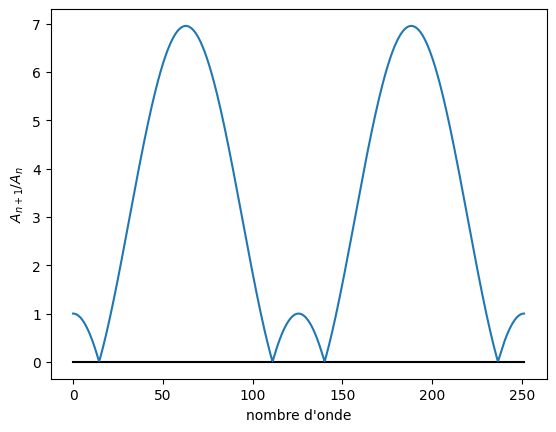

A_{n+1}/A_{n} =  6.9499803453315145


In [22]:
# critère de stabilité
k = linspace(0,4*pi*nx,1000)

if V.all() > 0 :
    critere1 = (V-2*mu*nx).all() < 0
    critere2 = (dt*nx*(V-2*mu*nx)).all() > -1
    print('V - 2mu/dx < 0          ', critere1 )
    print('dt/dx*(V-2.mu/dx) > -1  ',critere2)
   
    
elif  2*mu*dt*nx**2 < 1 :
    print('simulation stable')

else :
    print('simulation instable')

y = abs(1 - V.max()*dt*nx*( exp(1j * k/nx) - 1) -  4*mu*dt*nx**2*sin(k/nx/2)**2)

plot(k,zeros(len(k)),'k-')
plot(k,y)
ylabel('$A_{n+1} / A_{n} $')
xlabel("nombre d'onde")
show()
print('A_{n+1}/A_{n} = ',max(y))

# if max(y)>1 :
#         print('simulation numérique instable')
#         sys.exit()


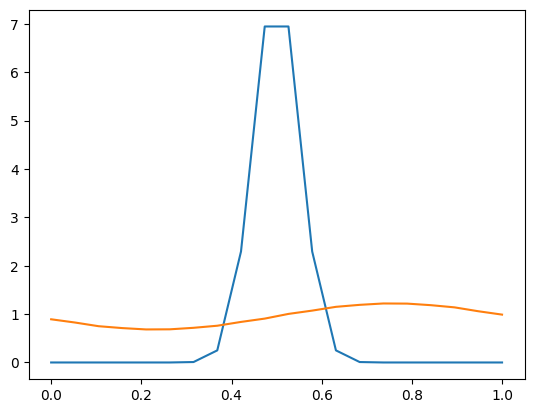

In [23]:
reload(o)
res = o.solver(grille,dt,t_end,mu,V,ORDRE).solve()
plot(linspace(0,1,grille.nx),res[0])
plot(linspace(0,1,grille.nx),res[-5])
show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
Creating animation: 4004it [02:47, 23.86it/s]                          


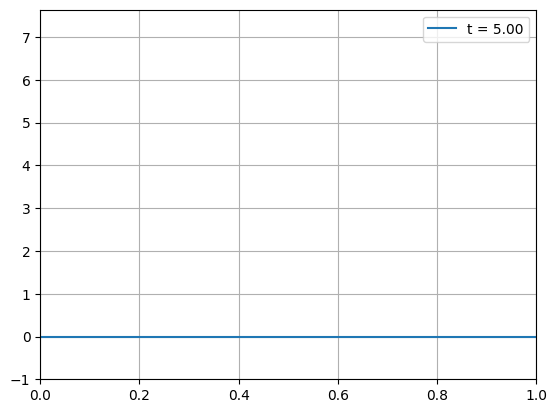

In [24]:

# plot(linspace(0,1,test.nx),abs(res[-5]-res[0]))
# show()
T = linspace(0,t_end,len(res))
if ANIM :
    o.anim(res,nx,fps=fps,name=f"nx{nx}-mu{mu}-V{V.max()}-order{ORDRE}.mp4",T=T)